In [ ]:
import matplotlib.pyplot as plt
import re
import os
from sklearn.preprocessing import label_binarize
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve,auc
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression

c(i). Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).
The usual time-domain features used in time series classification are: means, standard deviations, quatiles, skewness, kurtosis and other higher order moments, maximum and minimum values.

In [ ]:
rootdir = r'C:\\Users\\beiwa\\Desktop\\INF1\\552\\homework\\homework3\\AReM'
def data_extract(bk_time=1):
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    n = 1
    table_new = pd.DataFrame()
    for parent, dirnames, filenames in os.walk(rootdir, followlinks=True):
        for filename in filenames:
            file_path = os.path.join(parent, filename)
            data = pd.read_csv(file_path, skiprows=4, error_bad_lines=False)
            data.drop('# Columns: time', axis=1, inplace=True)
            i = 1
            length_data = len(data)
            m = int(length_data/bk_time)
            df = data.iloc[:m]
            for w in range(1,bk_time):
                df = pd.concat([df.reset_index(drop=True),data.iloc[w*m:(w+1)*m].add_prefix('new_'+str(w)).reset_index(drop=True)], axis=1)
            data = df

            table = {'bending': 1, 'Instance': n}

            for j in data.columns:
                data_min = data[j].min()
                data_max = data[j].max()
                data_mean = data[j].mean()
                data_median = data[j].median()
                data_std = data[j].std()
                data_1st = data[j].quantile(q=0.25)
                data_3rd = data[j].quantile(q=0.75)
                table.update({'min' + str(i): data_min, 'max' + str(i): data_max, 'mean' + str(i): data_mean,
                              'median' + str(i): data_median, 'std' + str(i): data_std, '1st quart' + str(i): data_1st,
                              '3rd quart' + str(i): data_3rd})
                i += 1
            table = pd.DataFrame(table, index=[0])
            #print(table)
            n += 1
            if 'bending' in file_path:
                if filename == 'dataset1.csv' or filename == 'dataset2.csv':
                    test_set = pd.concat([test_set, table], axis=0, ignore_index=True)

                else:
                    train_set = pd.concat([train_set, table], ignore_index=True, axis=0)
            else:
                table['bending'] = 0
                if filename == 'dataset1.csv' or filename == 'dataset2.csv' or filename == 'dataset3.csv':
                    test_set = pd.concat([test_set, table], axis=0, ignore_index=True)
                else:
                    train_set = pd.concat([train_set, table], ignore_index=True, axis=0)

            table_new = pd.concat([table_new, table], axis=0, ignore_index=True,sort=False)
    train_set.drop('Instance', axis=1, inplace=True)
    test_set.drop('Instance', axis=1, inplace=True)
    return table_new,train_set,test_set

c(ii). Extract the time-domain features minimum, maximum, mean, median, standard
deviation, rst quartile, and third quartile for all of the 6 time series
in each instance. You are free to normalize/standardize features or use them
directly.1
    Instance   min1   max1      mean1  median1      std1  1st quart1  \
0          1  37.25  45.00  40.624792   40.500  1.476967     39.2500   
1          2  38.00  45.67  42.812812   42.500  1.435550     42.0000   
2          3  35.00  47.40  43.954500   44.330  1.558835     43.0000   
3          4  33.00  47.75  42.179813   43.500  3.670666     39.1500   
4          5  33.00  45.75  41.678063   41.750  2.243490     41.3300   
5          6  37.00  48.00  43.454958   43.250  1.386098     42.5000   
6          7  36.25  48.00  43.969125   44.500  1.618364     43.3100   
7          8  12.75  51.00  24.562958   24.250  3.737514     23.1875   
8          9   0.00  42.75  27.464604   28.000  3.583582     25.5000   
9         10  21.00  50.00  32.586208   33.000  6.238143     26.1875   
10        11  27.50  33.00  29.881938   30.000  1.153837     29.0000   
11        12  19.00  45.50  30.938104   29.000  7.684146     26.7500   
12        13  25.00  47.50  31.058250   29.710  4.829794     27.5000   
13        14  24.25  45.00  37.177042   36.250  3.581301     34.5000   
14        15  27.00  45.00  36.819521   36.000  3.900459     33.7500   
15        16  27.00  44.33  36.541667   36.000  4.018922     33.2500   
16        17  18.50  44.25  35.752354   36.000  4.614802     33.0000   
17        18  19.00  43.75  35.879875   36.000  4.614878     33.0000   
18        19  23.33  43.50  36.244083   36.750  3.822016     33.4575   
19        20  24.25  45.00  37.177042   36.250  3.581301     34.5000   
20        21  28.75  44.75  37.561188   36.875  3.226507     35.2500   
21        22  22.00  44.67  37.058708   36.000  3.710180     34.5000   
22        23  19.00  44.00  36.228396   36.000  3.528617     34.0000   
23        24  26.50  44.33  36.687292   36.000  3.529404     34.2500   
24        25  25.33  45.00  37.114312   36.250  3.710385     34.5000   
25        26  26.75  44.75  36.863375   36.330  3.555787     34.5000   
26        27  26.25  44.25  36.957458   36.290  3.434863     34.5000   
27        28  27.75  44.67  37.144833   36.330  3.758904     34.0000   
28        29  23.50  30.00  27.716375   27.500  1.442253     27.0000   
29        30  23.50  30.00  27.716375   27.500  1.442253     27.0000   
..       ...    ...    ...        ...      ...       ...         ...   
58        59  33.33  48.00  44.334729   45.000  2.476940     42.2500   
59        60  36.00  45.80  42.419917   42.670  2.520129     41.3300   
60        61  37.00  48.25  42.516958   42.500  2.195751     41.0000   
61        62  36.25  45.50  42.959354   42.670  1.500878     42.0000   
62        63  36.00  47.33  42.674583   43.670  2.384170     40.0000   
63        64  36.25  45.75  43.187521   44.750  2.491162     39.7500   
64        65  36.00  47.33  44.441187   45.000  2.417797     44.6275   
65        66  35.50  46.25  43.174938   43.670  1.989052     42.5000   
66        67  32.75  47.00  42.760563   44.500  3.398919     41.3300   
67        68  30.00  46.67  42.648521   42.750  2.395338     41.5000   
68        69  36.00  47.50  43.720021   45.000  2.384105     43.0000   
69        70  34.50  47.75  44.471146   45.000  1.772553     45.0000   
70        71  35.50  48.00  46.224937   46.000  1.748315     45.2500   
71        72  29.75  48.00  46.932208   47.500  1.832665     47.2375   
72        73  36.33  47.67  45.399625   45.500  1.328121     45.0000   
73        74  19.33  43.50  34.227771   35.500  4.889576     30.5000   
74        75  21.50  51.25  34.253521   35.000  4.940741     30.9375   
75        76  19.50  45.33  33.586875   34.250  4.650935     30.2500   
76        77  19.75  45.50  34.322750   35.250  4.752477     31.0000   
77        78  19.50  46.00  34.546229   35.250  4.842294     31.2500   
78        79  23.50  46.25  34.873229   35.250  4.531720     31.7500   
79        80  19.25  44.00  34.473188   35.000  4.796705     31.2500   
80        81  12.50  45.00  33.509729   34.125  4.850923     30.5000   
81        82  15.00  46.75  34.660583   35.000  5.315110     31.0000   
82        83  18.00  46.00  35.193333   36.000  4.751868     32.0000   
83        84  20.75  46.25  34.763333   35.290  4.742208     31.6700   
84        85  21.50  51.00  34.935813   35.500  4.645944     32.0000   
85        86  18.33  47.67  34.333042   34.750  4.948770     31.2500   
86        87  18.33  45.75  34.599875   35.125  4.731790     31.5000   
87        88  15.50  43.67  34.225875   34.750  4.441798     31.2500   

    3rd quart1  min2   max2     ...          std5  1st quart5  3rd quart5  \
0      42.0000   0.0   1.30     ...      2.188449     33.0000     36.0000   
1      43.6700   0.0   1.22     ...      1.995255     32.0000     34.5000   
2      45.0000   0.0   1.70     ...      1.999604     35.3625     36.5000   
3      45.0000   0.0   3.00     ...      3.849448     30.4575     36.3300   
4      42.7500   0.0   2.83     ...      2.411026     28.4575     31.2500   
5      45.0000   0.0   1.58     ...      2.488862     22.2500     24.0000   
6      44.6700   0.0   1.50     ...      3.318301     20.5000     23.7500   
7      26.5000   0.0   6.87     ...      3.693786     20.5000     27.0000   
8      30.0000   0.0   7.76     ...      5.053642     15.0000     20.7500   
9      34.5000   0.0   9.90     ...      5.032424     17.6700     23.5000   
10     30.2700   0.0   1.00     ...      1.745970     17.0000     19.0000   
11     38.0000   0.0   6.40     ...      5.845911     15.0000     20.8125   
12     31.8125   0.0   6.38     ...      7.853427      9.0000     18.3125   
13     40.2500   0.0   8.58     ...      2.890347     17.9500     21.7500   
14     40.2500   0.0  10.47     ...      2.781030     15.5000     19.2700   
15     39.8125   0.0  10.43     ...      3.088141     15.0000     19.5000   
16     39.3300   0.0  12.60     ...      3.120057     14.0000     18.0625   
17     39.5000   0.0  11.20     ...      3.537635     14.7500     19.6900   
18     39.2500   0.0   9.71     ...      3.617702     15.7500     21.0000   
19     40.2500   0.0   8.58     ...      2.890347     17.9500     21.7500   
20     40.2500   0.0   9.91     ...      2.727377     18.0000     21.5000   
21     40.0625   0.0  14.17     ...      3.537144     16.0000     21.0000   
22     39.0000   0.0  12.28     ...      3.166655     14.0000     18.0625   
23     39.3725   0.0  12.89     ...      2.978238     14.6700     18.5000   
24     40.2500   0.0  10.84     ...      2.847876     14.7500     18.5000   
25     39.7500   0.0  11.68     ...      2.655906     15.0000     18.6700   
26     40.2500   0.0   8.64     ...      2.851673     14.0000     18.2500   
27     40.5000   0.0  10.76     ...      2.689291     15.0000     18.7500   
28     29.0000   0.0   1.79     ...      4.074511      5.5000     10.7500   
29     29.0000   0.0   1.79     ...      4.074454      5.5000     10.7500   
..         ...   ...    ...     ...           ...         ...         ...   
58     46.5000   0.0   3.90     ...      5.401794      9.3300     17.7500   
59     44.6175   0.0   2.12     ...      3.722074      7.6275     12.0000   
60     44.5000   0.0   2.12     ...      3.623557     12.6275     17.5000   
61     44.3300   0.0   2.60     ...      2.702605     14.0000     16.6900   
62     44.7500   0.0   2.17     ...      3.261617     12.7500     16.5000   
63     45.0000   0.0   2.83     ...      3.566038     16.5000     21.0000   
64     45.7500   0.0   4.50     ...      3.414454     11.0000     14.6700   
65     44.5000   0.0   2.12     ...      2.983976     12.7500     16.5000   
66     45.3725   0.0   3.34     ...      4.296574     13.0000     18.5650   
67     45.0000   0.0   2.95     ...      3.141679     10.6275     14.2500   
68     45.0000   0.0   1.92     ...      3.289138     11.3100     15.5425   
69     45.2500   0.0   2.18     ...      2.612390     12.0000     14.8125   
70     48.0000   0.0   4.50     ...      2.931581     12.0000     15.2500   
71     47.7500   0.0   4.60     ...      3.134822     11.6700     15.5000   
72     46.3300   0.0   1.66     ...      3.374095     11.2500     14.5000   
73     37.7500   0.0  14.50     ...      3.092094     14.7500     18.6700   
74     37.7500   0.0  13.55     ...      3.116627     13.7500     18.0000   
75     37.0000   0.0  14.67     ...      3.283983     13.7300     18.2500   
76     38.0000   0.0  13.47     ...      3.119856     13.5000     17.7500   
77     37.8125   0.0  12.47     ...      2.823124     14.0000     17.7500   
78     38.2500   0.0  14.82     ...      3.131076     13.7500     18.0000   
79     38.0000   0.0  13.86     ...      3.156320     13.7300     17.7500   
80     36.7500   0.0  13.05     ...      3.133564     14.6275     18.7500   
81     38.2500   0.0  13.44     ...      3.155015     14.2500     18.5000   
82     38.7500   0.0  16.20     ...      3.207642     14.2500     18.5000   
83     38.2500   0.0  12.68     ...      3.174681     14.2500     18.3300   
84     38.0625   0.0  12.21     ...      3.192058     14.2375     18.2500   
85     38.0000   0.0  12.48     ...      3.000493     13.7500     18.0000   
86     38.0000   0.0  15.37     ...      2.905688     14.0000     18.2500   
87     37.2500   0.0  17.24     ...      2.992920     14.3300     18.2500   

    min6   max6     mean6  median6      std6  1st quart6  3rd quart6  
0   0.00   1.92  0.570583    0.430  0.582915      0.0000      1.3000  
1   0.00   3.11  0.571083    0.430  0.601010      0.0000      1.3000  
2   0.00   1.79  0.493292    0.430  0.513506      0.0000      0.9400  
3   0.00   2.18  0.613521    0.500  0.524317      0.0000      1.0000  
4   0.00   1.79  0.383292    0.430  0.389164      0.0000      0.5000  
5   0.00   5.26  0.679646    0.500  0.622534      0.4300      0.8700  
6   0.00   2.96  0.555313    0.490  0.487826      0.0000      0.8300  
7   0.00   4.97  0.700188    0.500  0.693720      0.4300      0.8700  
8   0.00   6.76  1.122125    0.830  1.012342      0.4700      1.3000  
9   0.00  13.61  1.162042    0.830  1.332980      0.4700      1.3000  
10  0.00   6.40  0.701625    0.710  0.481103      0.4700      0.9400  
11  0.00   6.73  1.107354    0.830  1.080842      0.4700      1.3000  
12  0.00   4.92  1.098104    0.940  0.831480      0.5000      1.3000  
13  0.00   9.34  2.921729    2.500  1.852600      1.5000      3.9000  
14  0.00   8.99  2.887562    2.525  1.723094      1.5600      3.7700  
15  0.00   9.18  3.225458    2.870  1.769758      1.8850      4.2625  
16  0.00   9.39  3.069667    2.770  1.748326      1.7975      4.0600  
17  0.00   8.50  3.093021    2.930  1.626034      1.8900      4.0600  
18  0.00  11.15  3.530500    3.110  1.963685      2.1700      4.6175  
19  0.00   9.34  2.921729    2.500  1.852600      1.5000      3.9000  
20  0.00   9.62  2.765896    2.450  1.769203      1.4100      3.7700  
21  0.00   8.55  2.983750    2.570  1.815730      1.5000      4.1500  
22  0.00   9.98  3.480687    3.340  1.827769      2.1025      4.5500  
23  0.00   8.19  3.073312    2.690  1.629675      1.9125      4.0875  
24  0.00   9.50  3.076354    2.770  1.824534      1.7000      4.0375  
25  0.00   8.81  2.773312    2.590  1.569919      1.6400      3.6325  
26  0.00   8.34  2.934625    2.525  1.631380      1.6600      4.0300  
27  0.00   8.75  2.822437    2.590  1.637183      1.5800      3.7400  
28  0.00   4.50  0.734271    0.710  0.613688      0.4300      1.0000  
29  0.00   4.50  0.735396    0.710  0.612834      0.4300      1.0000  
..   ...    ...       ...      ...       ...         ...         ...  
58  0.00   5.02  0.933000    0.830  0.673609      0.4700      1.2500  
59  0.00   6.65  1.226271    1.090  0.891988      0.5000      1.5850  
60  0.00   6.85  0.977417    0.830  0.853280      0.4700      1.2200  
61  0.00   4.00  0.748479    0.820  0.461152      0.4300      0.9500  
62  0.00   3.77  0.702042    0.500  0.567451      0.4300      0.9400  
63  0.00   3.83  0.645458    0.500  0.567419      0.4300      0.8300  
64  0.00   5.91  1.155083    0.940  0.842087      0.5000      1.5000  
65  0.00   5.72  0.911979    0.830  0.666161      0.4700      1.2200  
66  0.00   5.73  0.842271    0.710  0.722165      0.4300      1.0900  
67  0.00   4.64  0.917354    0.830  0.709638      0.4700      1.1200  
68  0.00   6.18  1.039688    0.830  0.916657      0.4700      1.2200  
69  0.00   4.32  0.927375    0.830  0.756436      0.4700      1.2200  
70  0.00   6.00  0.882583    0.830  0.668423      0.4700      1.1200  
71  0.00   6.58  0.991125    0.830  0.855329      0.4700      1.2200  
72  0.00   4.50  0.795104    0.820  0.503007      0.4700      1.0000  
73  0.00   9.74  3.394125    3.100  1.792090      2.1050      4.4250  
74  0.00   8.32  3.500750    3.285  1.692378      2.1800      4.5575  
75  0.00   8.32  3.259729    3.110  1.640243      2.0500      4.3225  
76  0.00   9.67  3.432562    3.200  1.732727      2.1575      4.5650  
77  0.00  10.00  3.338125    3.080  1.656742      2.1600      4.3350  
78  0.00   9.51  3.424646    3.270  1.690960      2.1700      4.5000  
79  0.43   9.00  3.340458    3.090  1.699114      2.1200      4.3750  
80  0.00   8.96  3.378479    3.085  1.787360      2.0600      4.4400  
81  0.00   8.99  3.244396    3.000  1.630983      2.1200      4.2400  
82  0.00   8.50  3.241958    3.015  1.769182      1.8850      4.4400  
83  0.00   9.39  3.288271    3.270  1.647528      2.0500      4.3050  
84  0.00  10.21  3.280021    3.015  1.700918      2.1200      4.5000  
85  0.00   8.01  3.261583    2.980  1.617290      2.0500      4.3200  
86  0.00   8.86  3.289542    3.015  1.680170      2.1200      4.2600  
87  0.00   9.42  3.479542    3.270  1.761146      2.2400      4.5375  

[88 rows x 43 columns]

c(iii)Estimate the standard deviation of each of the time-domain features you
extracted from the data. Then, use Python's bootstrapped or any other
method to build a 90% bootsrap condence interval for the standard deviation
of each feature.
                Std                                     90% CI       SEM
bending     0.356863  [0.28747978728803447, 0.4033690761204284]  0.001170
min1        9.569975     [8.22691711630631, 10.669529995501454]  0.023759
max1        4.394362     [3.282063584105518, 5.273204996019578]  0.019515
mean1       5.335718    [4.6816390713388225, 5.865083653895153]  0.011570
median1     5.440054    [4.739672495396604, 5.9274344390293345]  0.011528
std1        1.772153     [1.568977863621821, 1.942590234954692]  0.003579
1st quart1  6.153590     [5.527027723719151, 6.613495955606108]  0.010306
3rd quart1  5.138925      [4.213137008742045, 5.84695202661513]  0.015370
min2        0.000000                                 [0.0, 0.0]  0.000000
max2        5.062729     [4.612083653137727, 5.397384445640807]  0.007369
mean2       1.574164    [1.3768575249099304, 1.704684201776762]  0.003131
median2     1.412244   [1.2411975512754758, 1.5302469571869424]  0.002865
std2        0.884105   [0.8008632133140234, 0.9384441621479901]  0.001355
1st quart2  0.946386   [0.8270838471570902, 1.0323729974021167]  0.001997
3rd quart2  2.125266     [1.890335593913623, 2.276044377886337]  0.003777
min3        2.956462   [2.7505234694637095, 3.0845455989546453]  0.003213
max3        4.875137      [4.21339982578359, 5.486690327243986]  0.012169
mean3       4.008380    [3.3497713378368266, 4.493504919420803]  0.010727
median3     4.036396    [3.4038937762402703, 4.498316399946679]  0.010541
std3        0.946710   [0.7546069280313368, 1.1206656164052469]  0.003525
1st quart3  4.220658    [3.6393719516397987, 4.697818754494026]  0.010087
3rd quart3  4.171628     [3.559381956827673, 4.663203167514417]  0.010695
min4        0.000000                                 [0.0, 0.0]  0.000000
max4        2.183625    [1.957010895837183, 2.3537063527183877]  0.003825
mean4       1.166114    [1.067247134314336, 1.2158579064285324]  0.001437
median4     1.145586    [1.055394853307827, 1.1917860207613942]  0.001351
std4        0.458242  [0.41744563354086106, 0.4823379502256208]  0.000630
1st quart4  0.843620   [0.7657535922168868, 0.8847130587719385]  0.001123
3rd quart4  1.552504   [1.4268390258281856, 1.6204559481843543]  0.001940
min5        6.124001     [4.435194514482717, 7.422966768536404]  0.029457
max5        5.741238      [4.67958711047935, 6.518115341569051]  0.017726
mean5       5.675593     [4.426776339523657, 6.752992221469897]  0.022358
median5     5.813782     [4.490940286939836, 6.922666619009403]  0.023100
std5        1.024898    [0.8141960716892963, 1.199415984349919]  0.003835
1st quart5  6.096465      [4.77882849577485, 7.110149275126461]  0.022565
3rd quart5  5.531720     [4.337618809733865, 6.461083608854164]  0.020502
min6        0.045838                 [0.0, 0.07802896990623483]  0.000896
max6        2.518921   [2.2393000837693435, 2.7455869127170636]  0.004896
mean6       1.154812   [1.0532450003508889, 1.2058225386101102]  0.001501
median6     1.086474    [0.9907362410302227, 1.138573004777751]  0.001421
std6        0.517617  [0.47474288922460023, 0.5417345103139695]  0.000652
1st quart6  0.758584   [0.6857802270754502, 0.8052572469754726]  0.001143
3rd quart6  1.523599    [1.399599816811277, 1.5913036885389866]  0.001870

c(iv)Use your judgement to select the three most important time-domain features
(one option may be min, mean, and max).
I calculate the sem of each feature's std, in which way I can get the features with the most variance. So, the features I choose are max, mean and 3rd quartile.

In [11]:
def iii_std():
    inter = {}
    inter2 = {}
    #table_new_std = data_extract()[0]
    table_new_std = data_extract()[0].drop('bending',axis=1)
    print(table_new_std)
    table_new_std = data_extract()[0].drop('Instance',axis=1).std()
    table_new_std = pd.DataFrame(table_new_std)
    for i in table_new_std._stat_axis.values:
        data = data_extract()[0][i]

        times = 1000
        Confidence = 0.9
        Samples_mean = np.empty(times)
        #samples_sem = np.empty(times)
        size = len(data)

        for j in range(times):
            Random_Sample = np.random.choice(data, size)
            Sample_mean = np.std(Random_Sample)
            Samples_mean[j] = Sample_mean

        sample_sem = stats.sem(Samples_mean)
        Confidence *= 100
        C_low = (100 - Confidence) / 2
        C_high = 100 - C_low
        C_interval = np.percentile(Samples_mean, [C_low, C_high])
        inter.update({i:[C_interval]})
        inter2.update({i:sample_sem})
    inter = pd.DataFrame(inter)
    inter2 = pd.DataFrame(inter2,index=[0])
    table1 = pd.concat([table_new_std, inter.T, inter2.T], axis=1, ignore_index=True)
    table1.columns = ['Std','90% CI','SEM']
    print(table1)

    
iii_std()

    Instance   min1   max1      mean1  median1      std1  1st quart1  \
0          1  37.25  45.00  40.624792   40.500  1.476967     39.2500   
1          2  38.00  45.67  42.812812   42.500  1.435550     42.0000   
2          3  35.00  47.40  43.954500   44.330  1.558835     43.0000   
3          4  33.00  47.75  42.179813   43.500  3.670666     39.1500   
4          5  33.00  45.75  41.678063   41.750  2.243490     41.3300   
5          6  37.00  48.00  43.454958   43.250  1.386098     42.5000   
6          7  36.25  48.00  43.969125   44.500  1.618364     43.3100   
7          8  12.75  51.00  24.562958   24.250  3.737514     23.1875   
8          9   0.00  42.75  27.464604   28.000  3.583582     25.5000   
9         10  21.00  50.00  32.586208   33.000  6.238143     26.1875   
10        11  27.50  33.00  29.881938   30.000  1.153837     29.0000   
11        12  19.00  45.50  30.938104   29.000  7.684146     26.7500   
12        13  25.00  47.50  31.058250   29.710  4.829794     27.

d(i). Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classication problem. Depict scatter plots
of the features you specied in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities. (See
p. 129 of the textbook).3

![image.png](attachment:image.png)


D:\Users\beiwa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Users\beiwa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Users\beiwa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Users\beiwa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


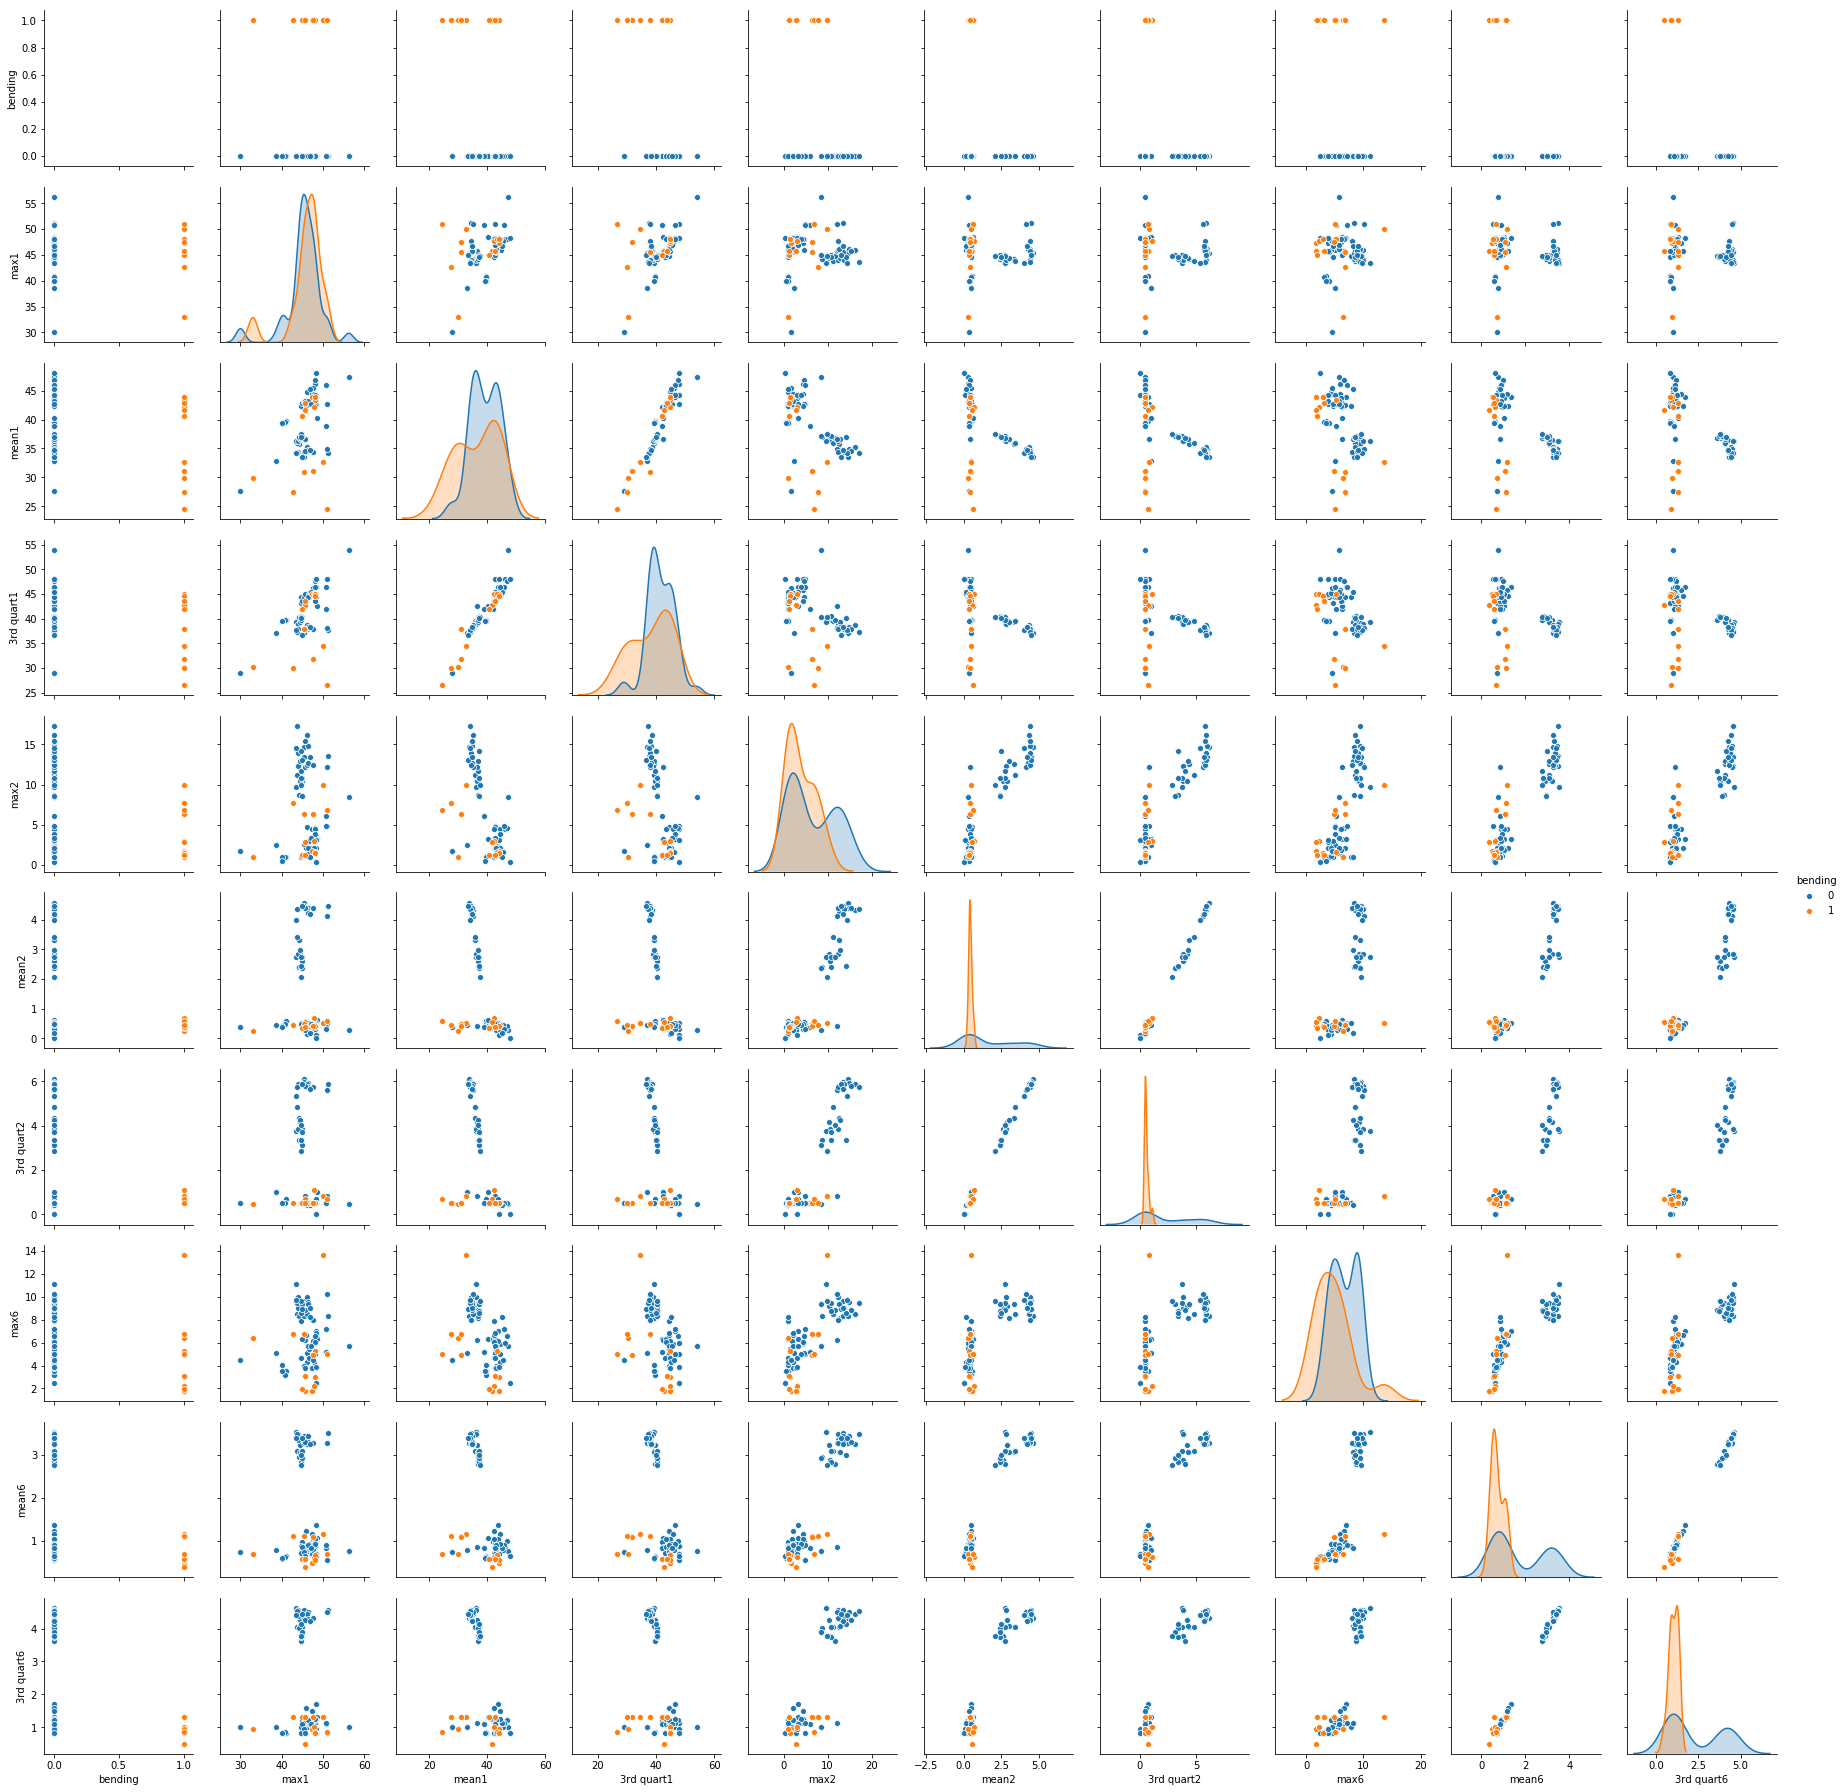

In [8]:
def scatter_di():
    train_set = data_extract()[1]
    test_set = data_extract()[2]
    train_set.drop([i for i in train_set.columns if i in 'Instance min1 median1 std1 1st quart1 min2 median2 std2 1st quart2 min3 max3 mean3 median3 std3 1st quart3 3rd quart3 min4 max4 mean4 median4 std4 1st quart4 3rd quart4 min5 max5 mean5 median5 std5 1st quart5 3rd quart5 min6 median6 std6 1st quart6'], axis=1, inplace=True)
    test_set.drop([i for i in test_set.columns if i in 'Instance min1 median1 std1 1st quart1 min2 median2 std2 1st quart2 min3 max3 mean3 median3 std3 1st quart3 3rd quart3 min4 max4 mean4 median4 std4 1st quart4 3rd quart4 min5 max5 mean5 median5 std5 1st quart5 3rd quart5 min6 median6 std6 1st quart6'], axis=1, inplace=True)
    #print(test_set)
    #print(train_set)
    fullset = pd.concat([train_set,test_set], axis=0)
    #print(fullset)
    #data_x = fullset.iloc[:,1:10].values
    #data_y = fullset.loc[:, 'bending'].values
    sns.pairplot(fullset,hue='bending')
    plt.show()

scatter_di()

d(ii). Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 1(d)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 12. Do you see any considerable difference
in the results with those of 1(d)i?

Acutally, I didn't see any distinct difference between them.

![image.png](attachment:image.png)

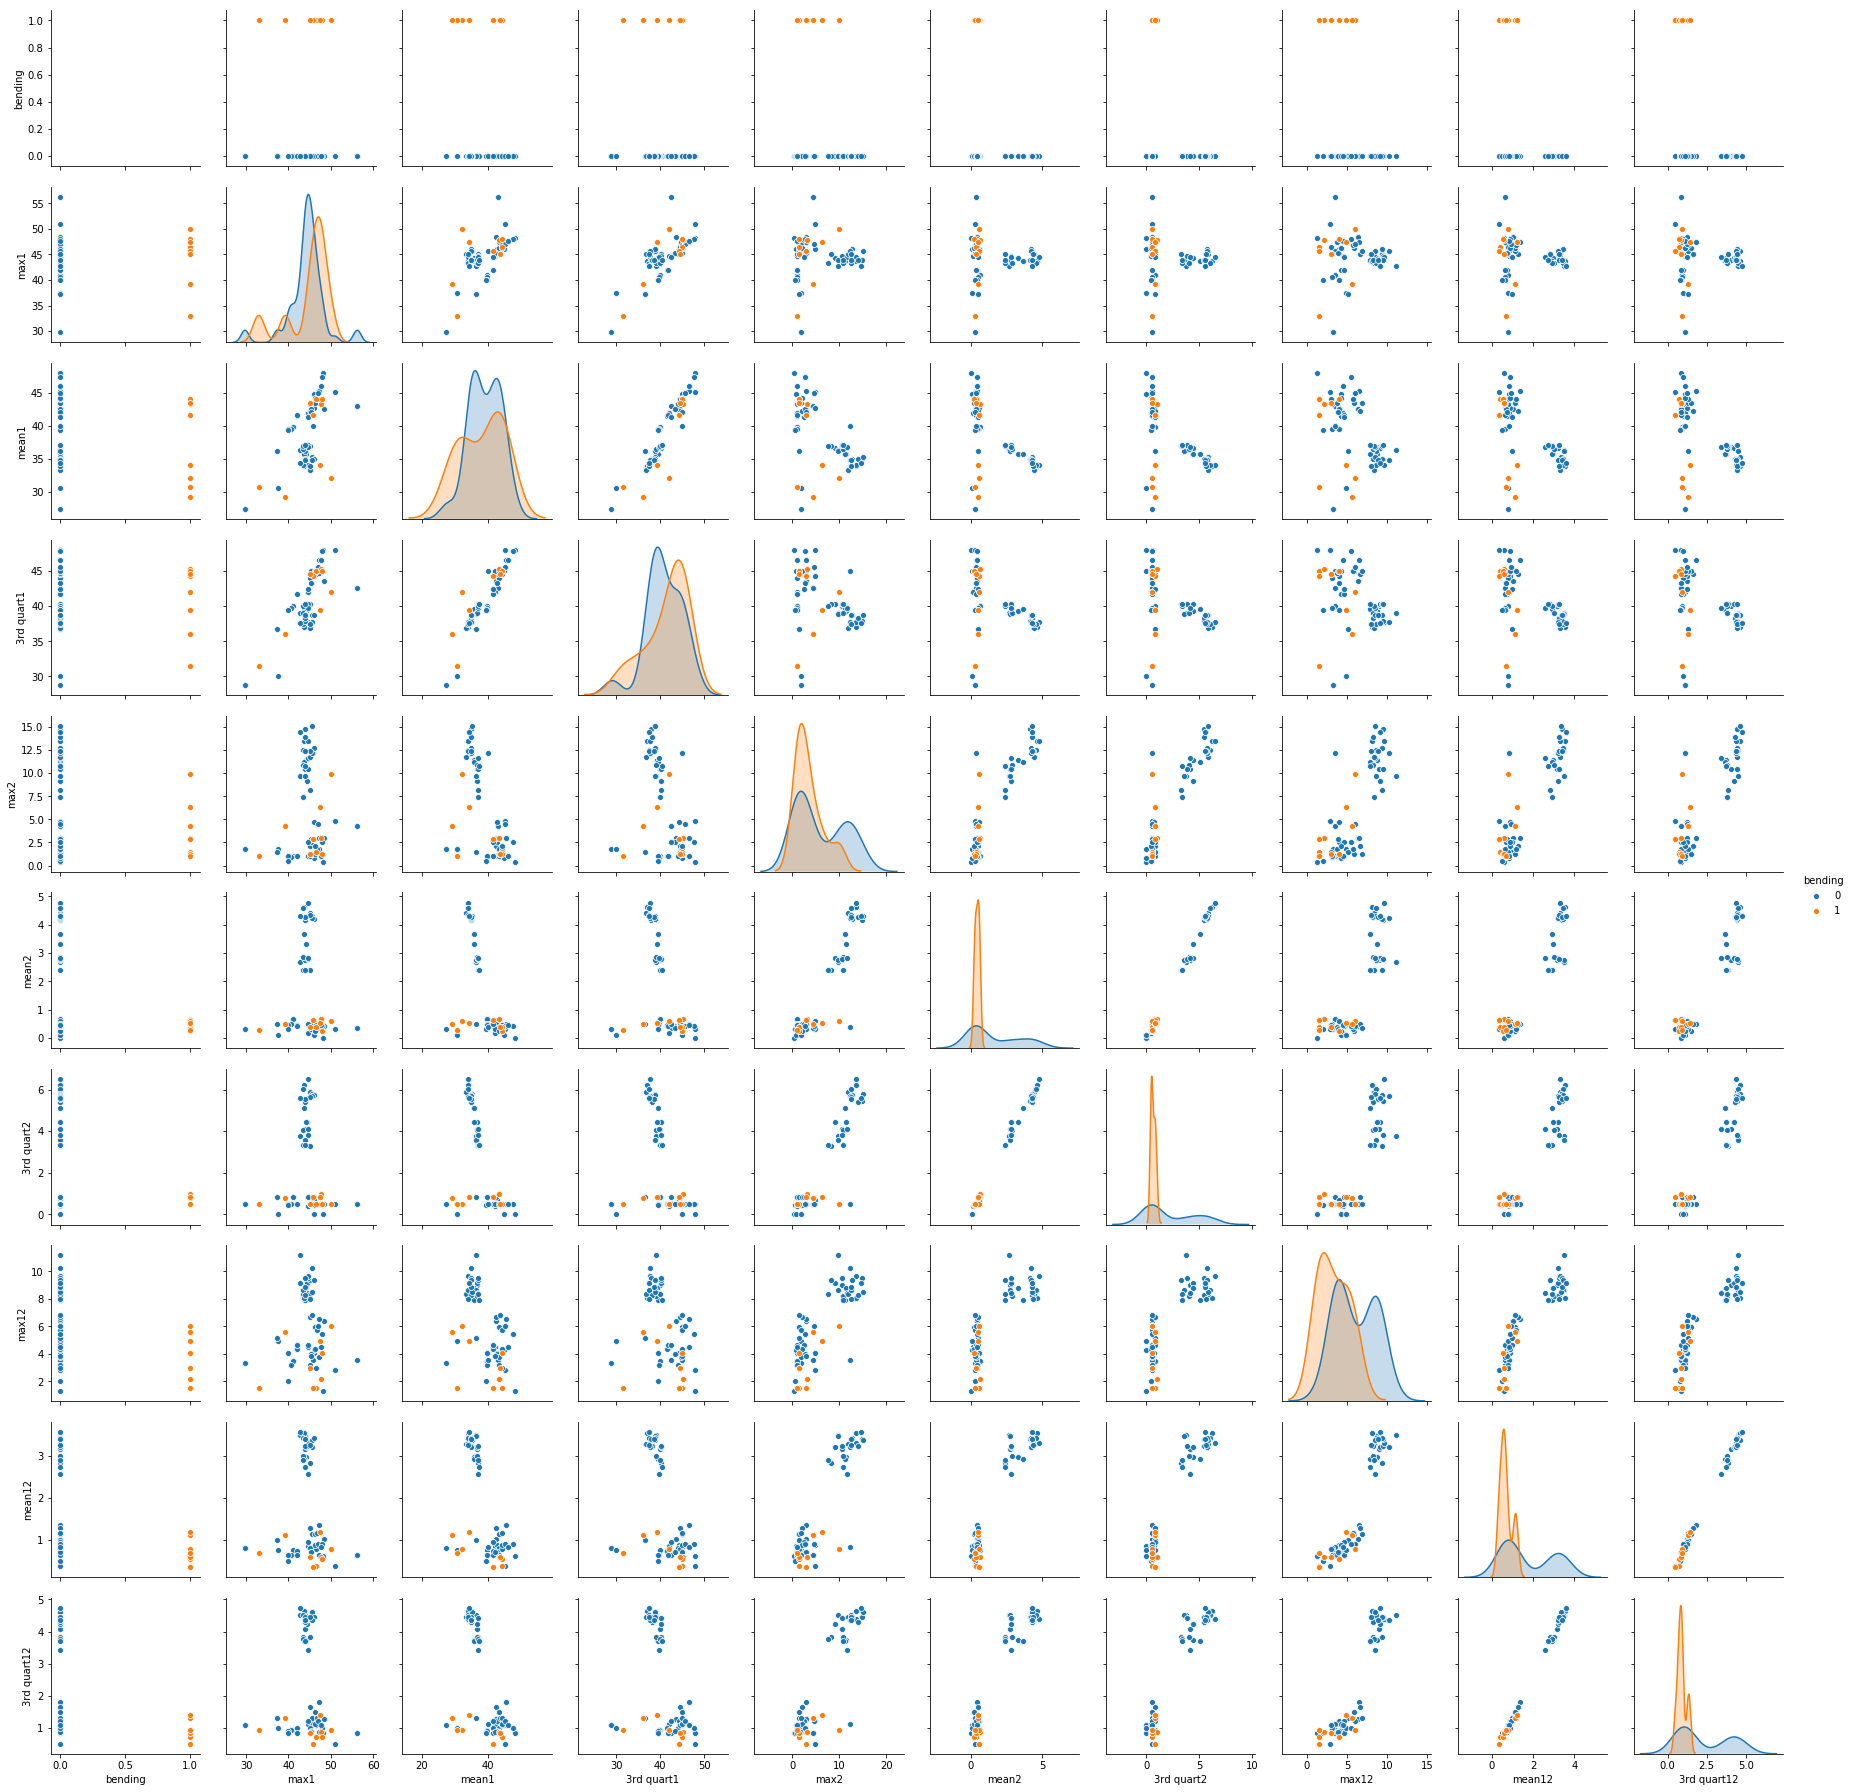

In [9]:
def dii():
    data_dii = data_extract(bk_time=2)
    train_set = data_dii[1]
    train_set = train_set.loc[:,('bending', 'max1','mean1','3rd quart1','max2','mean2','3rd quart2','max12','mean12','3rd quart12')]
    test_set = data_dii[2]
    data_set = data_dii[0].loc[:,('bending', 'max1','mean1','3rd quart1','max2','mean2','3rd quart2','max12','mean12','3rd quart12')]
    sns.pairplot(train_set, hue='bending')
    plt.show()

dii()

In [12]:
def rfe_cal(bk_time=1,penalty='l2'):
    
    #for i in (1,21):

    data = data_extract(bk_time=bk_time)

    train_set_x = data[1].iloc[:, 1:].values
    train_set_y = data[1].loc[:, 'bending'].values
    test_set_x = data[2].iloc[:, 1:].values
    test_set_y = data[2].loc[:, 'bending'].values
    if penalty == 'l1':
        train_set_x = normalize(train_set_x)
        test_set_x = normalize(test_set_x)

    scores, pvalues = chi2(train_set_x, train_set_y)  # calculate the p values
    # print(pvalues)
    cv = StratifiedKFold(n_splits=5)  # stratified method, 5 folds
    # classifier = LogisticRegressionCV(scoring='accuracy', penalty='l2', solver='liblinear',cv=cv)
    classifier = LogisticRegression(solver='liblinear',penalty=penalty)
    # for j in range(1,)
#其实出现了well separated，但因为加了惩罚项，正则化以后避免了自变量的多元共线性。
    rfe = RFECV(classifier, scoring='accuracy', cv=cv)   #min_features_to_select=1
    # rfe = RFE(classifier,scoring='accuracy')
    # rfe = rfe.fit(train_set_x,train_set_y)
    rfe = rfe.fit(train_set_x, train_set_y)
    support = rfe.support_
    #print(support)  #7 9 29 30
    train_accuracy = rfe.score(train_set_x, train_set_y)
    #accuracy.append(train_accuracy)
    test_set_predic = rfe.predict(test_set_x)
    train_set_xnew = rfe.transform(train_set_x)
    test_set_xnew = rfe.transform(test_set_x)
    print(support)
    #print('The test error is ', rfe.score(test_set_x,test_set_y))

    return rfe, test_set_predic, train_set_xnew, test_set_xnew, train_set_y, train_set_x, test_set_x, test_set_y, support, train_accuracy

d(iii)
The right way:
Use the cross validation to calculate the cross-validation score (accuracy) in feature selection. After comparing the scores, use the highest score of models of p features of current l.Then, use cross-validation again to choose the model which has the best score in all l models. In a word, to select l and features, we all need to use cross validation. Cross validation is used for every possible model.

The wrong way is to use cross-validation without all the features at first and not use cross validation for every model.

The best model is when l=1,p=4. Features selected are "3rd quartile1"," max2"," min5"," max5".

d(iv). Report the confusion matrix and show the ROC and AUC for your classier
on train data. Report the parameters of your logistic regression i's as well
as the p-values associated with them.

P-values are:
[3.99688063e-01 1.20981026e-03 2.78982384e-36 3.22181328e-12]

Coefficients are: 
[[-0.27148856 -0.19878155  0.22582884  0.33246246]]

Intercept is:
[-0.0114756]

Confusing matirx:
[[60  0]
 [ 0  9]]

AUC = 1.0

![image.png](attachment:image.png)


d(v). Test the classier on the test set. Remember to break the time series in
your test set into the same number of time series into which you broke your
training set. Remember that the classier has to be tested using the features
extracted from the test set. Compare the accuracy on the test set with the
cross-validation accuracy you obtained previously.

Confusing matirx:
[[15  0]
 [ 0  4]]

AUC = 1.0

The accuracy remains the same, still 1.

d(vi). Do your classes seem to be well-separated to cause instability in calculating
logistic regression parameters?

I find my classes do have the well-separated problem which causes instability. However, I can use
LogisticRegression of SKLEARN, which adds Penalty to avoid this problem. 

d(vii). From the confusion matrices you obtained, do you see imbalanced classes?
If yes, build a logistic regression model based on case-control sampling and
adjust its parameters. Report the confusion matrix, ROC, and AUC of the
model.



To be honest, I highly doubt that there is imbalanced classes problem. As you can see, the performance of this selected model is rather good! If there was imbalance problem, I should have got a highly biased result, which apparently didn't happen. So, I think no imbalanced class exists.


[False False False False False False  True False  True False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False]


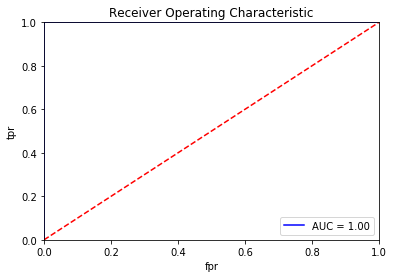

[3.99688063e-01 1.20981026e-03 2.78982384e-36 3.22181328e-12]
[[60  0]
 [ 0  9]]
[[15  0]
 [ 0  4]]
[[-0.27148856 -0.19878155  0.22582884  0.33246246]]
[-0.0114756]
1.0


D:\Users\beiwa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


In [16]:
def diii():  #when l=1,p=4时最先出现最大值。
    rfe = rfe_cal(bk_time=1)
    test_set_predic = rfe[1]
    train_set_xnew = rfe[2]
    test_set_xnew = rfe[3]
    train_set_y = rfe[4]
    train_set_x = rfe[5]
    test_set_x = rfe[6]
    test_set_y = rfe[7]
    cv = StratifiedKFold(n_splits=5)  # stratified method, 5 folds
    classifier_new = LogisticRegressionCV(scoring='accuracy', penalty='l2', solver='liblinear', cv=cv)
    classifier_new.fit(train_set_xnew,train_set_y)
    train_set_predic = classifier_new.predict(train_set_xnew)
    test_set_predic = classifier_new.predict(test_set_xnew)
    vc_matrix1 = confusion_matrix(train_set_y, train_set_predic)
    vc_matrix2 = confusion_matrix(test_set_y, test_set_predic)

    predictions = classifier_new.predict_proba(train_set_xnew)  # 每一类的概率.我的概率都是百分百了。。。auc也画不出来啊
    false_positive_rate, recall, thresholds = roc_curve(train_set_y, predictions[:,1])
    roc_auc = auc(false_positive_rate, recall)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.show()
    scores, pvalues = chi2(train_set_xnew, train_set_y)
    print(pvalues)
    print(vc_matrix1)
    print(vc_matrix2)
    print(classifier_new.coef_)
    print(classifier_new.intercept_)
    #print(classifier_new.get_params(deep=True))

    test_score = classifier_new.score(test_set_xnew,test_set_y)
    print(test_score)


diii()

(e) Binary Classication Using L1-penalized logistic regression
i. Repeat 1(d)iii using L1-penalized logistic regression,7 i.e. instead of using pvalues
for variable selection, use L1 regularization. Note that in this problem,
you have to cross-validate for both l, the number of time series into which you
break each of your instances, and , the weight of L1 penalty in your logistic
regression objective function (or C, the budget). Packages usually perform
cross-validation for  automatically.
e(i)
The test accuracy is  1.0 when l=2 and The best C is  [166.81005372]

e(ii). Compare the L1-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?

Variable selection using p-values performs better, however, L1-penalized is easier to implement.

In [25]:
def logistic_e():  #得分为0.8695652173913043
    '''rfe = rfe_cal(bk_time=1,penalty='l1')
    test_set_predic = rfe[1]
    train_set_xnew = rfe[2]
    test_set_xnew = rfe[3]
    train_set_y = rfe[4]
    train_set_x = rfe[5]
    test_set_x = rfe[6]
    test_set_y = rfe[7]'''
    data = data_extract(bk_time=2)

    train_set_x = data[1].iloc[:, 1:].values
    train_set_y = data[1].loc[:, 'bending'].values
    test_set_x = data[2].iloc[:, 1:].values
    test_set_y = data[2].loc[:, 'bending'].values
    train_set_x = normalize(train_set_x)
    test_set_x = normalize(test_set_x)
    cv = StratifiedKFold(n_splits=5)  # stratified method, 5 folds
    classifier_new = LogisticRegressionCV(scoring='accuracy', penalty='l1', solver='liblinear', cv=cv)
    classifier_new.fit(train_set_x, train_set_y)
    #train_set_predic = classifier_new.predict(train_set_x)
    train_score = classifier_new.score(train_set_x, train_set_y)
    test_score = classifier_new.score(test_set_x, test_set_y)
    print('The test accuracy is ',test_score)
    print('The train accuracy is', train_score)
    print('The best C is ', classifier_new.C_)

    
logistic_e()

The test accuracy is  1.0
The train accuracy is 1.0
The best C is  [166.81005372]


D:\Users\beiwa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
D:\Users\beiwa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


f(i). Find the best l in the same way as you found it in 1(e)i to build an L1-
penalized multinomial regression model to classify all activities in your training
set.9 Report your test error. Research how confusion matrices and ROC
curves are dened for multiclass classication and show them for this problem
if possible.10
For multi-class using LogisticRegression :
The best C is  [166.81005372 166.81005372 166.81005372 166.81005372 166.81005372
 166.81005372 166.81005372]
Test error = 0.10526315789473684
Following is the confusion matrix: 
[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]
 
![image.png](attachment:image.png)

f(ii). Repeat 1(f)i using a Nave Bayes' classier. Use Multinomial priors and compare the results.
Test error = 0.21052631578947367
Following is the confusion matrix: 
[[2 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]

![image.png](attachment:image.png)

D:\Users\beiwa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Users\beiwa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\beiwa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\beiwa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\beiwa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: Convergenc

The best C is  [166.81005372 166.81005372 166.81005372 166.81005372 166.81005372
 166.81005372 166.81005372]
Test error = 0.10526315789473684
Following is the confusion matrix: 
[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


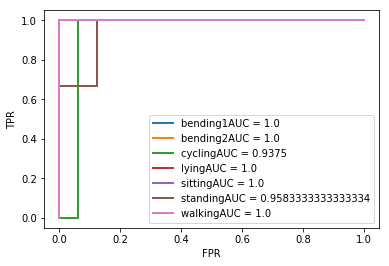

Test error = 0.21052631578947367
Following is the confusion matrix: 
[[2 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


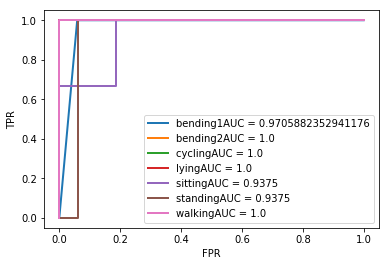

In [31]:
def multiclass(classifier_cus='LogisticRegressionn',bk_time=1):#Test error = 0.10526315789473684
    #str = "C:\\Users\\beiwa\\Desktop\\INF1\\552\\homework\\homework3\\AReM\walking\dataset9.csv"
    #print (re.findall(r"AReM\\(.+?)\\dataset",str))
    bk_time = bk_time
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    n = 1
    table_new = pd.DataFrame()
    for parent, dirnames, filenames in os.walk(rootdir, followlinks=True):
        for filename in filenames:
            file_path = os.path.join(parent, filename)
            data = pd.read_csv(file_path, skiprows=4, error_bad_lines=False)
            data.drop('# Columns: time', axis=1, inplace=True)
            # print(file_path)
            i = 1
            length_data = len(data)
            m = int(length_data / bk_time)
            df = data.iloc[:m]
            for w in range(1, bk_time):
                df = pd.concat([df.reset_index(drop=True),
                                data.iloc[w * m:(w + 1) * m].add_prefix('new_' + str(w)).reset_index(drop=True)],
                               axis=1)
            data = df

            table = {'activity': re.findall(r"AReM\\(.+?)\\dataset", file_path), 'Instance': n}

            for j in data.columns:
                data_min = data[j].min()
                data_max = data[j].max()
                data_mean = data[j].mean()
                data_median = data[j].median()
                data_std = data[j].std()
                data_1st = data[j].quantile(q=0.25)
                data_3rd = data[j].quantile(q=0.75)
                table.update({'min' + str(i): data_min, 'max' + str(i): data_max, 'mean' + str(i): data_mean,
                              'median' + str(i): data_median, 'std' + str(i): data_std,
                              '1st quart' + str(i): data_1st,
                              '3rd quart' + str(i): data_3rd})
                i += 1
            table = pd.DataFrame(table, index=[0])
            # print(table)
            n += 1
            if 'bending' in file_path:
                if filename == 'dataset1.csv' or filename == 'dataset2.csv':
                    test_set = pd.concat([test_set, table], axis=0, ignore_index=True, sort=False)

                else:
                    train_set = pd.concat([train_set, table], ignore_index=True, axis=0, sort=False)
            else:

                if filename == 'dataset1.csv' or filename == 'dataset2.csv' or filename == 'dataset3.csv':
                    test_set = pd.concat([test_set, table], axis=0, ignore_index=True, sort=False)
                else:
                    train_set = pd.concat([train_set, table], ignore_index=True, axis=0, sort=False)

            table_new = pd.concat([table_new, table], axis=0, ignore_index=True, sort=False)
    train_set.drop('Instance', axis=1, inplace=True)
    test_set.drop('Instance', axis=1, inplace=True)
    # print(train_set)
    # print(table_new)
    train_set_x = train_set.iloc[:, 1:].values
    train_set_y = train_set.loc[:, 'activity'].values
    
    test_set_x = test_set.iloc[:, 1:].values
    test_set_y = test_set.loc[:, 'activity'].values
    

    cv = StratifiedKFold(n_splits=5)  # stratified method, 5 folds
    # classifier = LogisticRegressionCV(scoring='accuracy', penalty='l2', solver='liblinear',cv=cv)
    if classifier_cus == 'LogisticRegressionn':
        classifier = LogisticRegression(solver='liblinear', penalty='l1', multi_class='ovr')
        train_set_x = normalize(train_set_x)
        test_set_x = normalize(test_set_x)
    elif classifier_cus == 'GaussianNB':
        classifier = GaussianNB()
    elif classifier_cus == 'MultinomialNB':
        classifier = MultinomialNB()
    # for j in range(1,)
    # 其实出现了well separated，但因为加了惩罚项，正则化以后避免了自变量的多元共线性。
    # rfe = RFECV(classifier, scoring='accuracy', cv=cv, min_features_to_select=1)
    # rfe = RFE(classifier,scoring='accuracy')
    # rfe = rfe.fit(train_set_x,train_set_y)
    #rfe = rfe.fit(train_set_x, train_set_y)
    # support = rfe.support_
    # print(support)  #7 9 29 30
    # train_accuracy = 1 - rfe.score(train_set_x, train_set_y)
    # test_accuracy = rfe.score(test_set_x, test_set_y)
    # accuracy.append(train_accuracy)
    '''test_set_predic = rfe.predict(test_set_x)
    train_set_xnew = rfe.transform(train_set_x)
    test_set_xnew = rfe.transform(test_set_x)
    train_accuracy = 1 - rfe.score(train_set_x, train_set_y)
    test_accuracy = 1 - rfe.score(test_set_x, test_set_y)'''
    # accuracy_all.update({"l":bk_time, "train_accuracy":train_accuracy, "test accuracy":test_accuracy})
    # print(accuracy_all)

    # print(train_accuracy)
    activity = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
    # cv = StratifiedKFold(n_splits=5)  # stratified method, 5 folds
    if classifier_cus == 'LogisticRegressionn':
        classifier_new = LogisticRegressionCV(scoring='accuracy', cv=cv, penalty='l1', solver='saga',
                                              multi_class='multinomial')
    elif classifier_cus == 'GaussianNB':
        classifier_new = GaussianNB()
    elif classifier_cus == 'MultinomialNB':
        classifier_new = MultinomialNB()
    classifier_new.fit(train_set_x, train_set_y)
    train_set_predic = classifier_new.predict(train_set_x)
    test_set_predic = classifier_new.predict(test_set_x)
    # print(test_set_predic)
    vc_matrix = confusion_matrix(test_set_y, test_set_predic)

    predictions = classifier_new.predict_proba(train_set_x)
    # 每一类的概率.我的概率都是百分百了。。。auc也画不出来啊
    # print(predictions)
    # false_positive_rate, recall, thresholds = roc_curve(train_set_y, predictions[:, 1])
    # roc_auc = auc(false_positive_rate, recall)
    test_score = classifier_new.score(test_set_x, test_set_y)
    # print(test_score)

    # test_set_xnew = preprocessing.scale(test_set_xnew)  #dtest = test_set_xnew,tY= test_set_y
    testerr = 1 - classifier_new.score(test_set_x, test_set_y)
    if classifier_cus == 'LogisticRegressionn':
        print('The best C is ', classifier_new.C_)
    print('Test error = ' + str(testerr))
    print('Following is the confusion matrix: ')
    print(vc_matrix)
    # print(test_set_y)
    # Y=label_binarize(Y,classes=range(7))
    test_set_y = label_binarize(test_set_y, classes=activity)
    # print(test_set_y)
    plt.figure()
    xdata = dict()
    ydata = dict()
    test_score = classifier_new.predict_proba(test_set_x)
    auc_var = dict()

    for i in range(0, 7):
        res = roc_curve(test_set_y[:, i], test_score[:, i])
        xdata[i] = res[0]
        ydata[i] = res[1]
        auc_var[i] = auc(res[0], res[1])
        plt.plot(res[0], res[1], lw=2, label=activity[i] + 'AUC = ' + str(auc_var[i]))
    plt.legend(loc='lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    plt.show()
        

multiclass(classifier_cus='LogisticRegressionn',bk_time=1)

multiclass(classifier_cus='MultinomialNB',bk_time=16)   #'l': 16, 'train_accuracy': 0.6811594202898551,  Test error = 0.5263157894736843


ii. Repeat 1(f)i using a Nave Bayes' classier. Use Gaussian priors and compare the results.

Test error = 0.368421052631579
Following is the confusion matrix: 
[[0 0 0 2 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]

![image.png](attachment:image.png)


f(iii).Which method is better for multi-class classication in this problem?
Because the test error of Gaussian Naïve Bayes classifier is smaller than multinomial classifier, so Gaussian is better.



D:\Users\beiwa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.82352941 0.82352941 0.83333333 0.75       1.        ]
Test error = 0.368421052631579
Following is the confusion matrix: 
[[0 0 0 2 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


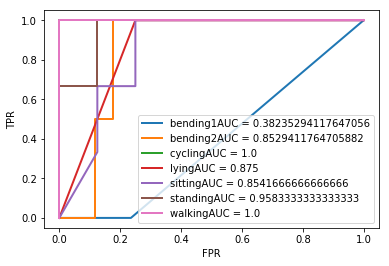

In [32]:
def gaussian():  #l =2 时得分最高，Test error = 0.1578947368421053
    for bk_time in range(2,3):
        cv = StratifiedKFold(n_splits=5)
        train_set = pd.DataFrame()
        test_set = pd.DataFrame()
        n = 1
        table_new = pd.DataFrame()
        for parent, dirnames, filenames in os.walk(rootdir, followlinks=True):
            for filename in filenames:
                file_path = os.path.join(parent, filename)
                data = pd.read_csv(file_path, skiprows=4, error_bad_lines=False)
                data.drop('# Columns: time', axis=1, inplace=True)
                # print(file_path)
                i = 1
                length_data = len(data)
                m = int(length_data / bk_time)
                df = data.iloc[:m]
                for w in range(1, bk_time):
                    df = pd.concat([df.reset_index(drop=True),
                                    data.iloc[w * m:(w + 1) * m].add_prefix('new_' + str(w)).reset_index(drop=True)],
                                   axis=1)
                data = df

                table = {'activity': re.findall(r"AReM\\(.+?)\\dataset", file_path), 'Instance': n}

                for j in data.columns:
                    data_min = data[j].min()
                    data_max = data[j].max()
                    data_mean = data[j].mean()
                    data_median = data[j].median()
                    data_std = data[j].std()
                    data_1st = data[j].quantile(q=0.25)
                    data_3rd = data[j].quantile(q=0.75)
                    table.update({'min' + str(i): data_min, 'max' + str(i): data_max, 'mean' + str(i): data_mean,
                                  'median' + str(i): data_median, 'std' + str(i): data_std,
                                  '1st quart' + str(i): data_1st,
                                  '3rd quart' + str(i): data_3rd})
                    i += 1
                table = pd.DataFrame(table, index=[0])
                # print(table)
                n += 1
                if 'bending' in file_path:
                    if filename == 'dataset1.csv' or filename == 'dataset2.csv':
                        test_set = pd.concat([test_set, table], axis=0, ignore_index=True, sort=False)

                    else:
                        train_set = pd.concat([train_set, table], ignore_index=True, axis=0, sort=False)
                else:

                    if filename == 'dataset1.csv' or filename == 'dataset2.csv' or filename == 'dataset3.csv':
                        test_set = pd.concat([test_set, table], axis=0, ignore_index=True, sort=False)
                    else:
                        train_set = pd.concat([train_set, table], ignore_index=True, axis=0, sort=False)

                table_new = pd.concat([table_new, table], axis=0, ignore_index=True, sort=False)
        train_set.drop('Instance', axis=1, inplace=True)
        test_set.drop('Instance', axis=1, inplace=True)
        # print(train_set)
        # print(table_new)
        train_set_x = train_set.iloc[:, 1:].values
        train_set_y = train_set.loc[:, 'activity'].values
        test_set_x = test_set.iloc[:, 1:].values
        test_set_y = test_set.loc[:, 'activity'].values
        # if penalty == 'l1':
        #train_set_x = normalize(train_set_x)
        #test_set_x = normalize(test_set_x)

        # scores, pvalues = chi2(train_set_x, train_set_y)  # calculate the p values
        # print(pvalues)
        cv = StratifiedKFold(n_splits=5)  # stratified method, 5 folds

        # for j in range(1,)
        # 其实出现了well separated，但因为加了惩罚项，正则化以后避免了自变量的多元共线性。



        activity = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
        #cv = StratifiedKFold(n_splits=5)  # stratified method, 5 folds

        classifier_new = GaussianNB()

        classifier_new.fit(train_set_x, train_set_y)
        #train_set_predic = classifier_new.predict(train_set_x)
        test_set_predic = classifier_new.predict(test_set_x)
        #print(test_set_predic)
        vc_matrix = confusion_matrix(test_set_y, test_set_predic)

        #predictions = classifier_new.predict_proba(train_set_x)
        # 每一类的概率.我的概率都是百分百了。。。auc也画不出来啊
        #print(predictions)
        #false_positive_rate, recall, thresholds = roc_curve(train_set_y, predictions[:, 1])
        #roc_auc = auc(false_positive_rate, recall)
        train_scores = cross_val_score(classifier_new, train_set_x, train_set_y, cv=cv, scoring='accuracy')
        print(train_scores)
        #test_score = classifier_new.score(test_set_x, test_set_y)
        #print(test_score)

        #test_set_x = preprocessing.scale(test_set_x)  #dtest = test_set_xnew,tY= test_set_y
        testerr = 1-classifier_new.score(test_set_x, test_set_y)
        print('Test error = ' + str(testerr))
        print('Following is the confusion matrix: ')
        print(vc_matrix)
        #print(test_set_y)
        #Y=label_binarize(Y,classes=range(7))
        test_set_y = label_binarize(test_set_y, classes=activity)
        #print(test_set_y)
        plt.figure()
        xdata=dict()
        ydata=dict()
        test_score=classifier_new.predict_proba(test_set_x)
        auc_var = dict()

        for i in range(0,7):
            res=roc_curve(test_set_y[:,i],test_score[:,i])
            xdata[i]=res[0]
            ydata[i]=res[1]
            auc_var[i]=auc(res[0],res[1])
            plt.plot(res[0],res[1],lw=2,label=activity[i] + 'AUC = ' + str(auc_var[i]))
        plt.legend(loc='lower right')
        plt.xlabel('FPR')
        plt.ylabel('TPR')

        plt.show()

gaussian()

ISLR 3.7.4
(a)	The cubic regression has lower training RSS due to more features than linear regression, also fits the training dataset better.
(b)	However, cubic regression comes with high variance( overfitting), so test RSS would be higher than linear regression.
(c)	Same as (a), because there are more features in cubic regression, it can fit the data better, so the polynomial regression has the lower training RSS.
(d)	Acutally, in this case, we don’t know how far it is from linear relationship, we cannot decide which gives us lower test RSS. If the real relationship is closer to cubic relationship, then the test RSS of cubic regression may be lower than the linear regression, otherwise it will be higher, but the training RSS of cubic regression will remain lower than the linear regression. It needs more information to draw a conlusion.


ISLR 4.7.3

![1551161645%281%29.png](attachment:1551161645%281%29.png)

ISLR 4.7.7
The Bayes'classifier is not linear, and it is in fact
quadratic.


![1551161718%281%29.png](attachment:1551161718%281%29.png)